In [178]:
import networkx as nx
from itertools import combinations
import matplotlib.pylab as plt # Para graficar networkx y demases
import matplotlib.cm as cm # para mapas de colores

In [197]:
def get_percolated_cliques(G, k):
    if k < 2:
        raise nx.NetworkXError("k=%d, k must be greater than 1."%k)
        
    cliques = list(frozenset(c) for c in nx.find_cliques(G) if len(c) >= k)

    perc_graph = nx.Graph()
    perc_graph.add_nodes_from(cliques)
    
    for c1, c2 in combinations(cliques, 2):
        if len(c1.intersection(c2)) >= (k - 1):
            perc_graph.add_edge(c1, c2)

    for component in nx.connected_components(perc_graph):
        yield(frozenset.union(*component))

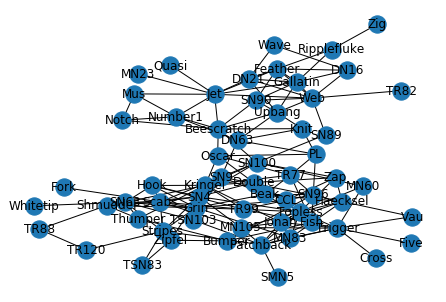

In [179]:
Red_delfines = nx.read_gml('./data/dolphins.gml')
posiciones = nx.kamada_kawai_layout(Red_delfines)
nx.draw(Red_delfines, pos = posiciones, with_labels = True)

Hago un dict con delfin: comunidad

In [192]:
communities_dict = {}
for i, community in enumerate(list(get_percolated_cliques(Red_delfines, 3))):
    for dolphin in community:
        communities_dict.setdefault(dolphin, [])
        communities_dict[dolphin].append(i)   

Esto es una trampa por ahora sólo para quedarme con una comunidad y plotear con una lista. Se va a ir

In [199]:
node_color_list = []
node_list = []
for node in communities_dict.keys():
    node_color_list.append(communities_dict[node][0])

In [194]:
def graficar_particion(Red,particion_diccionario,posiciones):
  cmap = cm.get_cmap('viridis', 3) # viridis es el mapa de colores
  # grafico los nodos
    
  nx.draw_networkx_nodes(Red, posiciones, particion_diccionario.keys(), node_size=200,
                        cmap=cmap, node_color= node_color_list, with_labels = False)
  # grafico los enlaces aparte
  nx.draw_networkx_edges(Red,pos = posiciones, alpha=0.5)

In [195]:
posiciones = nx.kamada_kawai_layout(Red_delfines)

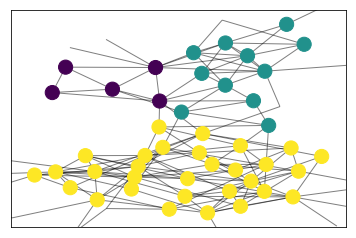

In [196]:
graficar_particion(Red_delfines,communities_dict,posiciones)

# TODO:
* Recorrer con varios k y buscar óptimo (con qué heurística?)
* Si un nodo está en varias comunidades, ponerle otro color
* En el gráfico poner todos los nodos (acá muestra sólo los que están en comunidades)
* Los más sociables son los que están en dos comunidades?